#### Importanto bibliotecas

In [2]:
import pandas as pd
import numpy as np
import re 

import seaborn as sns 
import matplotlib.pyplot as plt 

import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor

#### Verificação inicial do DF

In [3]:
df = pd.read_csv('train.csv')

df.head(10)

,AdiposeTissue,Density,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist,BodyFat,Age
0,29.99,1.03,189.16,65.77,40.77,106.51,100.49,100.41,NaN,38.16,24.01,35.91,NaN,**19.06,29.83,Idoso
1,26.98,1.04,"""167.69""**",69.18,38.5,101.43,100.06,96.11,56.18,36.65,21.99,29.69,"""26,24""",17.99,*27.12,Muito Idoso
2,*8.92//,1.08,160.07,69.04,36.79,97.32,83.62,98.51,58.72,35.33,22.63,30.14*,26.71,**17.58,"8,82",Jovem
3,34.57,1.02,229.37,NaN,/40.37,/114.93,115.82,"""112.13""",74.4**,NaN,24.03,36.11,31.82,18.79,34.4,Adulto
4,20.26,1.05,224.77,72.41,43.9,NaN,100.57//,106.63,**63.38,41.74,24.67,37.15,33.1,19.8,20.65,Adulto
5,26.66,1.04,161.35,NaN,35.13,NaN,94.27,100.11,NaN,35.87,"21,02",27.78,26.1,"""17.59""","26,42",Meia-Idade
6,21.19,1.05,210.37,NaN,38.97,NaN,94.65,107.7,65.94,"""""41,96""""",25.61,NaN,30.61,NaN,21.18,Jovem
7,***20.54,1.05,181.44,68.11,"""39.13""",100.19,NaN,102.62,/61.84,NaN,22.51,33.05,28.28,NaN,"/ /20,42",NaN
8,13.02,1.07,150.87,67.13,NaN,92.42,82.82,96.36,59.94,38.1/,"21,99","""31,56""",NaN,16.73,12.94,Adulto
9,25.3,1.04,198.85,74.21,NaN,105.32,NaN,/106.77,64.04,42.59,23.41,33.2//,30.01,18.41,24.97,Meia-Idade


In [4]:
df.info()
#df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 177000 entries, 0 to 176999
Data columns (total 16 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   AdiposeTissue  147831 non-null  object
 1   Density        158899 non-null  object
 2   Weight         162922 non-null  object
 3   Height         146827 non-null  object
 4   Neck           151861 non-null  object
 5   Chest          140791 non-null  object
 6   Abdomen        150852 non-null  object
 7   Hip            144818 non-null  object
 8   Thigh          147837 non-null  object
 9   Knee           148842 non-null  object
 10  Ankle          146835 non-null  object
 11  Biceps         144819 non-null  object
 12  Forearm        148843 non-null  object
 13  Wrist          155883 non-null  object
 14  BodyFat        177000 non-null  object
 15  Age            152867 non-null  object
dtypes: object(16)
memory usage: 21.6+ MB


#### Problemas encontrados:

 1. Dataframe sujo;
 2. Varias linhas com valores nulos;
 3. Idade como uma variavel categorica e nao numerica;
 4. Os dados da coluna Peso e Altura parecem estar errados ou trocados.

#### Limpando os dados

In [5]:
df_copy = df.copy()

# usando regex para limpar as colunas

colunas = df_copy.columns.tolist()
print (colunas)

for col in colunas:
    if col != 'Age':
        df_copy[col] = df_copy[col].astype(str).str.replace(',', '.')
        df_copy[col] = df_copy[col].apply(lambda x: re.sub(r'[^0-9.]', '', str(x)))
        df_copy[col] = pd.to_numeric(df_copy[col], errors='coerce')


df_copy.head(10)


['AdiposeTissue', 'Density', 'Weight', 'Height', 'Neck', 'Chest', 'Abdomen', 'Hip', 'Thigh', 'Knee', 'Ankle', 'Biceps', 'Forearm', 'Wrist', 'BodyFat', 'Age']


,AdiposeTissue,Density,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist,BodyFat,Age
0,29.99,1.03,189.16,65.77,40.77,106.51,100.49,100.41,NaN,38.16,24.01,35.91,NaN,19.06,29.83,Idoso
1,26.98,1.04,167.69,69.18,38.50,101.43,100.06,96.11,56.18,36.65,21.99,29.69,26.24,17.99,27.12,Muito Idoso
2,8.92,1.08,160.07,69.04,36.79,97.32,83.62,98.51,58.72,35.33,22.63,30.14,26.71,17.58,8.82,Jovem
3,34.57,1.02,229.37,NaN,40.37,114.93,115.82,112.13,74.40,NaN,24.03,36.11,31.82,18.79,34.40,Adulto
4,20.26,1.05,224.77,72.41,43.90,NaN,100.57,106.63,63.38,41.74,24.67,37.15,33.10,19.80,20.65,Adulto
5,26.66,1.04,161.35,NaN,35.13,NaN,94.27,100.11,NaN,35.87,21.02,27.78,26.10,17.59,26.42,Meia-Idade
6,21.19,1.05,210.37,NaN,38.97,NaN,94.65,107.70,65.94,41.96,25.61,NaN,30.61,NaN,21.18,Jovem
7,20.54,1.05,181.44,68.11,39.13,100.19,NaN,102.62,61.84,NaN,22.51,33.05,28.28,NaN,20.42,NaN
8,13.02,1.07,150.87,67.13,NaN,92.42,82.82,96.36,59.94,38.10,21.99,31.56,NaN,16.73,12.94,Adulto
9,25.30,1.04,198.85,74.21,NaN,105.32,NaN,106.77,64.04,42.59,23.41,33.20,30.01,18.41,24.97,Meia-Idade


#### Lidando com os valores nulos

In [6]:
# verificar o % de valores nulos por coluna
total = df_copy.isnull().sum().sort_values(ascending=False)
percent = (df_copy.isnull().sum()/len(df_copy)*100).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(10)

,Total,Percent
Chest,36209,20.457062
Hip,32182,18.181921
Biceps,32181,18.181356
Height,30173,17.046893
Ankle,30165,17.042373
AdiposeTissue,29169,16.479661
Thigh,29163,16.476271
Knee,28158,15.908475
Forearm,28157,15.907910
Abdomen,26148,14.772881


In [7]:
# nulos no meu resultado
# Se tiver nulos na coluna bodyfat, essa linha precisaria ser desconsiderada no treinamento 

target_null = df_copy['BodyFat'].isnull().sum()
print(f"Nulos no alvo (BodyFat): {target_null}")

Nulos no alvo (BodyFat): 0


In [8]:
# vendo quantidade de nulos por linha

null_in_line = df_copy.isnull().sum(axis=1)

print(null_in_line.value_counts())

2    51286
1    39225
3    38221
4    27152
0    14079
5     4022
6     2010
7     1005
Name: count, dtype: int64


In [9]:
df_copy.shape

(177000, 16)

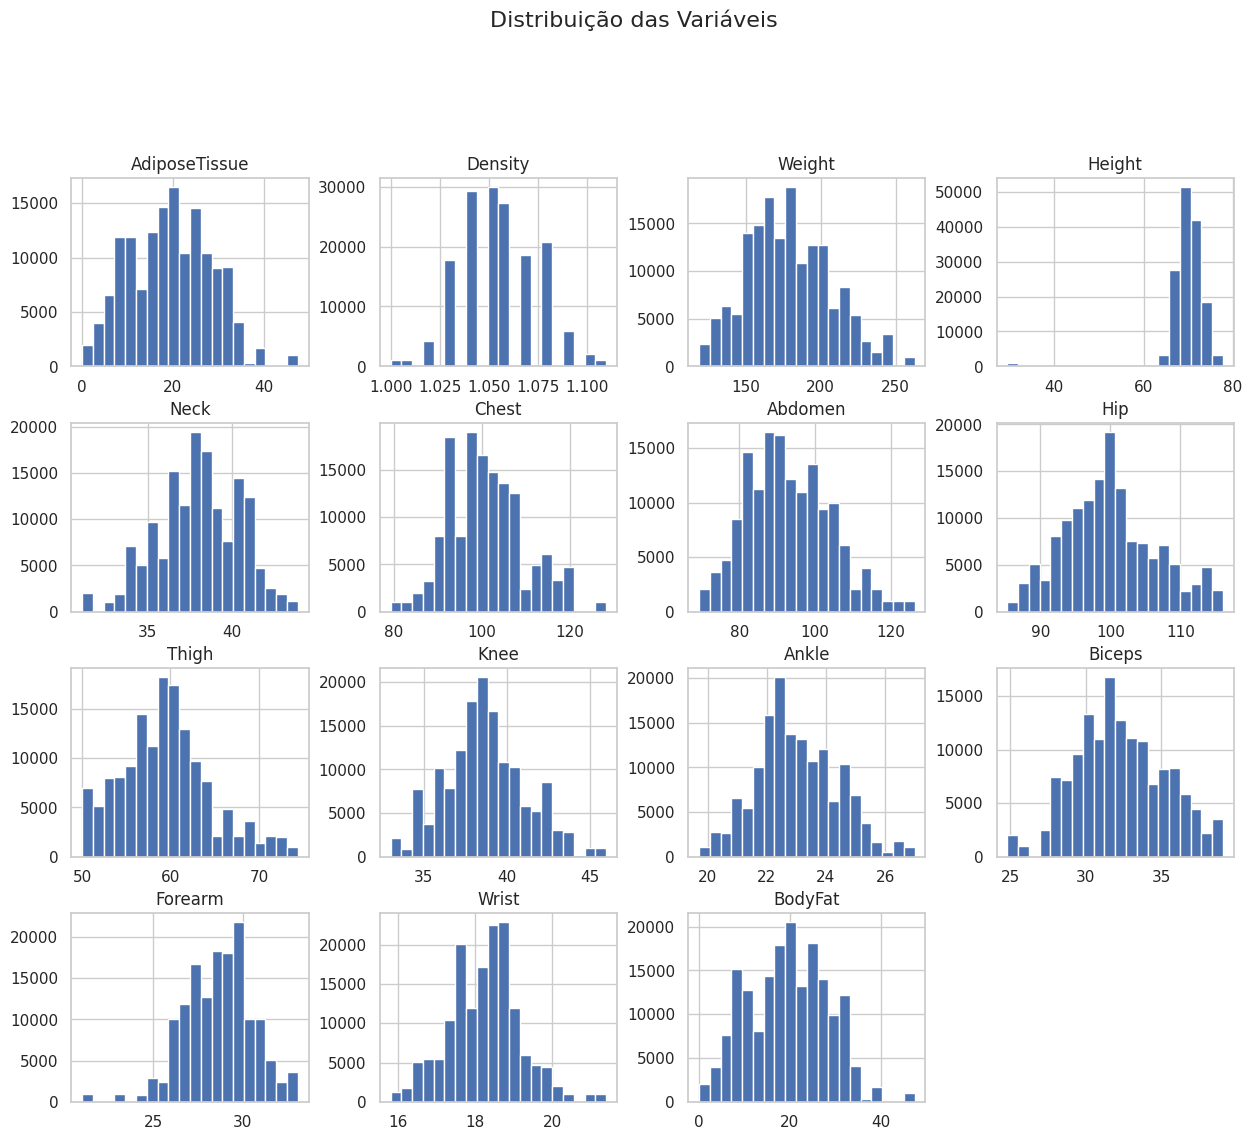

In [10]:
# verificar distribuição das variáveis numéricas sem tratamento de valores nulos

sns.set(style="whitegrid")
df_copy.hist(bins=20, figsize=(15, 12))
plt.suptitle('Distribuição das Variáveis', y=1.02, size=16)
plt.show()

#### Analisando Coluna Age

In [11]:
df_copy['Age'].unique()

array(['Idoso', 'Muito Idoso', 'Jovem', 'Adulto', 'Meia-Idade', nan],
      dtype=object)

In [12]:
# tratamento dos valores nulos em Age

df_copy['Age'] = df_copy['Age'].fillna('Desconhecido')
print(df_copy['Age'].value_counts())

percent_null = (df_copy['Age'] == 'Desconhecido').mean() * 100
print(f"Porcentagem de Age nulo: {percent_null:.2f}%")

Age
Adulto          85017
Meia-Idade      24602
Desconhecido    24133
Jovem           20598
Idoso           17622
Muito Idoso      5028
Name: count, dtype: int64
Porcentagem de Age nulo: 13.63%


In [13]:
# label encoding para preparar os dados para a amostragem estratificada

age_map = {
    'Desconhecido': 0,
    'Jovem': 1,
    'Adulto': 2,
    'Meia-Idade': 3,
    'Idoso': 4,
    'Muito Idoso': 5
}

df_copy['Age'] = df_copy['Age'].map(age_map)
print(df_copy['Age'].unique())

[4 5 1 2 3 0]


#### Amostragem Estratificada e Substituição de Valores Nulos por KNN

In [14]:
# preparar o codigo para a amostragem estratificada

df_resto, df_final= train_test_split(df_copy, test_size=0.2, random_state=42, stratify=df_copy['Age'])

In [15]:
print(df_final.shape)

(35400, 16)


In [16]:
# Substituir os valores nulos em Age por NaN para preparar os dados para o KNN
# O KNNImputer só identifica o que precisa ser preenchido se o valor for NaN

df_final['Age'] = df_final['Age'].replace(0, np.nan)


In [76]:
# Removendo a coluna alvo dos conjuntos de treino e teste.

X_final = df_final.drop(columns=['BodyFat'])
y_final = df_final['BodyFat']

# Normalizar para atribuir os mesmos pesos a todas as variáveis

scaler = StandardScaler()
X_final_scaled = scaler.fit_transform(X_final)

# Aplicar o KNN imputer para preencher os valores nulos nas colunas numéricas

imputer = KNNImputer(n_neighbors=5)
X_final_imputed = imputer.fit_transform(X_final_scaled)

# Retornando para a escala original 
df_limpo = pd.DataFrame(scaler.inverse_transform(X_final_imputed), 
                        columns=X_final.columns, 
                        index=X_final.index)

# Arredondar o resultado de Age e converter para int para voltar para a escala do label encoding original

df_limpo['Age'] = df_limpo['Age'].round().astype(int)

df_analise = pd.concat([df_limpo, y_final], axis=1)

print(df_limpo['Age'].unique())


[1 2 4 3 5]


In [77]:
df_analise.head(10)

,AdiposeTissue,Density,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist,Age,BodyFat
24524,12.240,1.070,178.320,70.270,37.680,99.618,90.716,99.030,60.23,39.18,23.198,31.70,28.420,18.600,1,12.45
9043,26.930,1.040,218.970,74.160,39.950,108.700,104.950,107.648,67.95,42.80,24.090,35.51,29.040,19.050,2,26.94
104835,4.220,1.090,184.096,73.950,38.080,100.720,82.350,99.690,62.79,38.32,23.820,35.83,31.150,18.210,2,3.93
162234,16.590,1.060,173.520,71.546,37.680,98.254,90.780,99.872,60.09,39.17,23.380,32.50,29.870,17.410,2,16.34
55091,34.140,1.020,228.650,71.464,40.350,114.850,116.210,111.830,74.35,42.58,23.960,36.10,31.760,18.810,2,34.20
176258,17.590,1.058,152.644,69.900,36.406,91.346,80.050,93.410,54.97,36.26,22.110,29.87,26.630,17.894,2,17.58
58196,21.400,1.050,209.174,71.320,39.410,107.602,97.670,108.760,66.09,41.38,23.720,36.96,31.578,18.790,2,21.13
68736,19.924,1.060,165.240,68.560,31.100,92.980,87.280,96.530,54.57,39.04,24.820,31.07,29.420,18.800,2,17.82
103751,27.320,1.040,216.530,74.480,40.210,115.390,104.250,108.980,63.67,40.31,23.190,36.71,31.000,18.940,2,27.20
125245,19.640,1.050,170.230,68.390,39.092,96.030,90.420,102.528,61.91,38.02,22.310,33.35,28.260,18.080,2,19.65


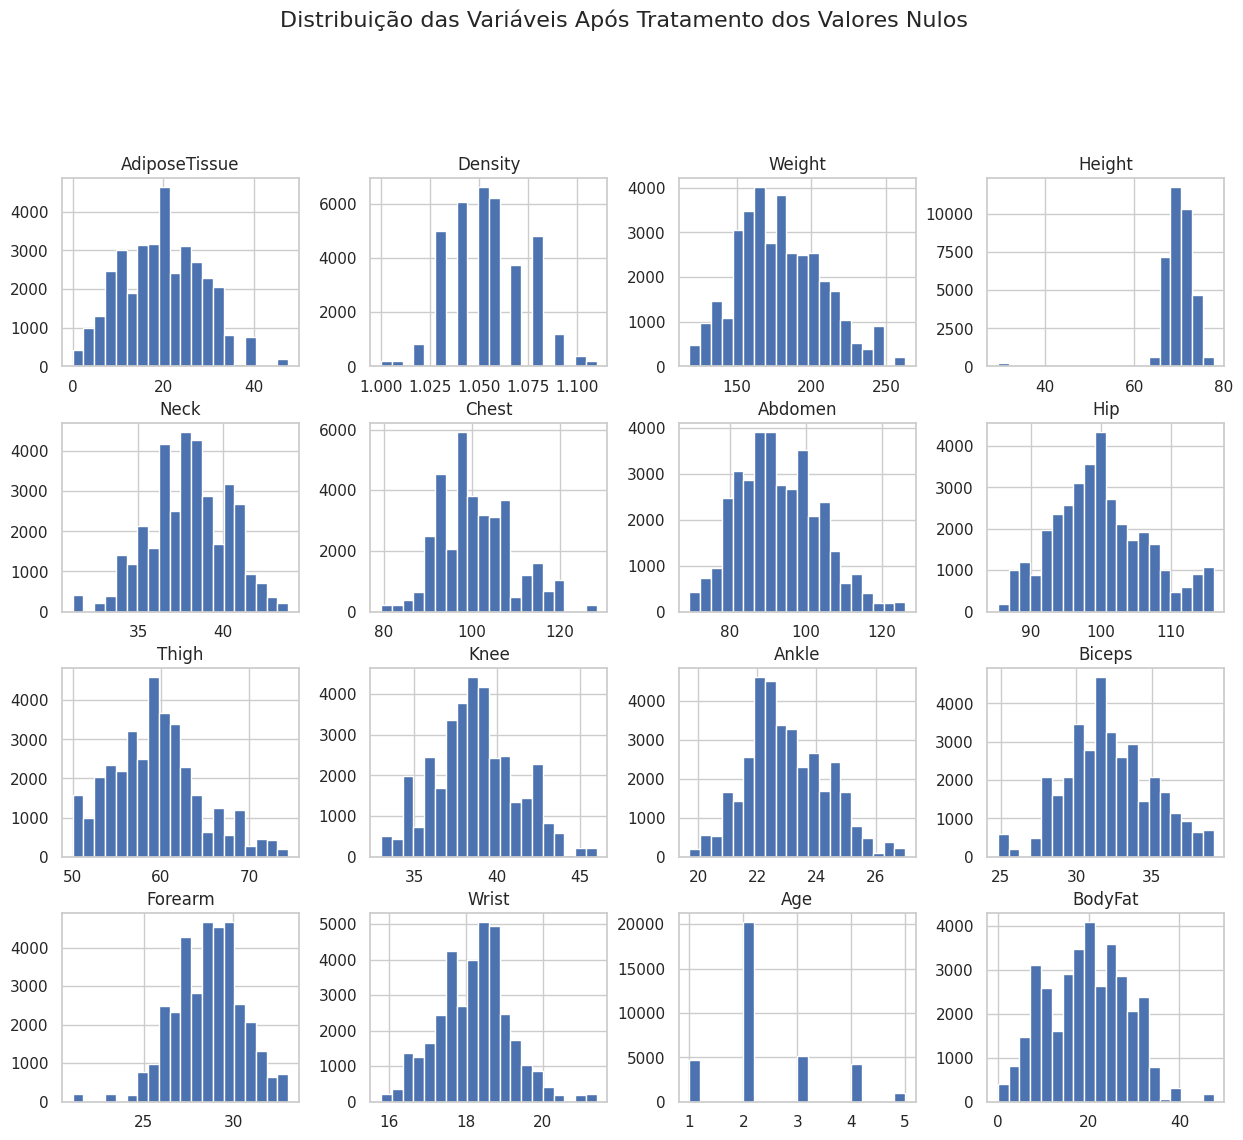

In [78]:
# Analisando a distribuição das variáveis após o tratamento dos valores nulos

sns.set(style="whitegrid")
df_analise.hist(bins=20, figsize=(15, 12))
plt.suptitle('Distribuição das Variáveis Após Tratamento dos Valores Nulos', y=1.02, size=16)

plt.show()  

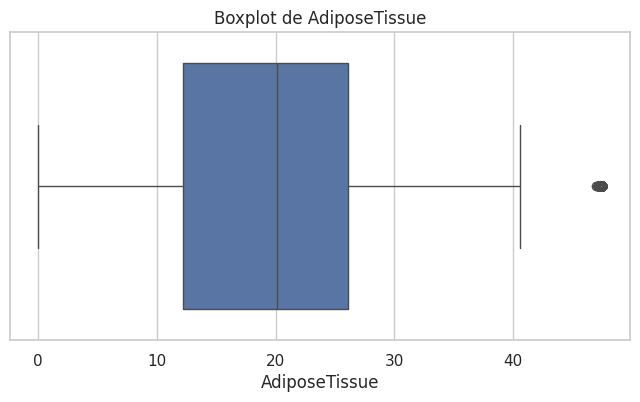

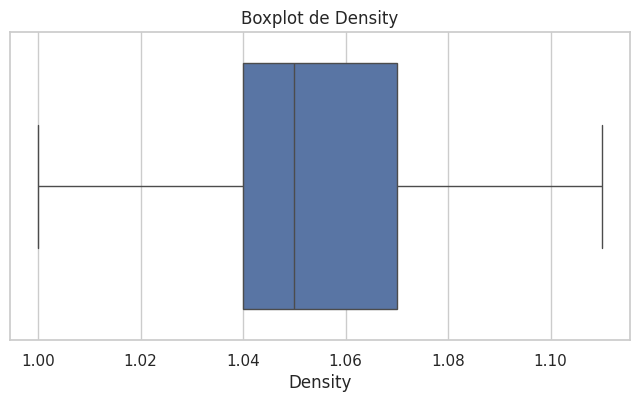

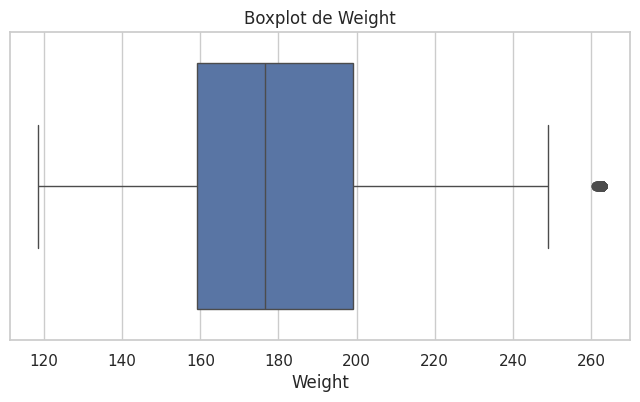

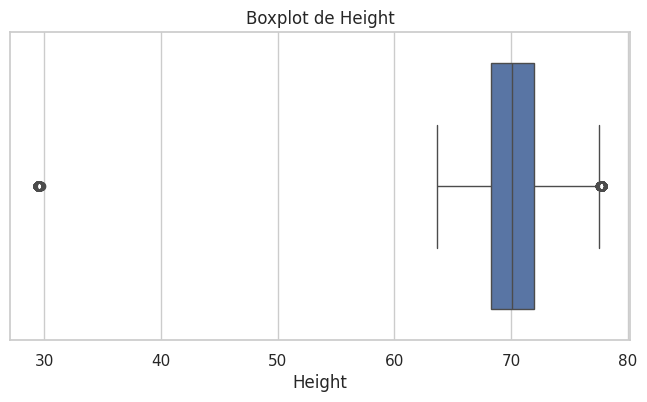

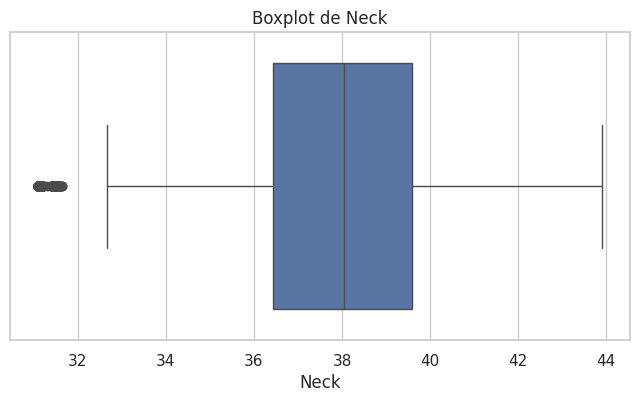

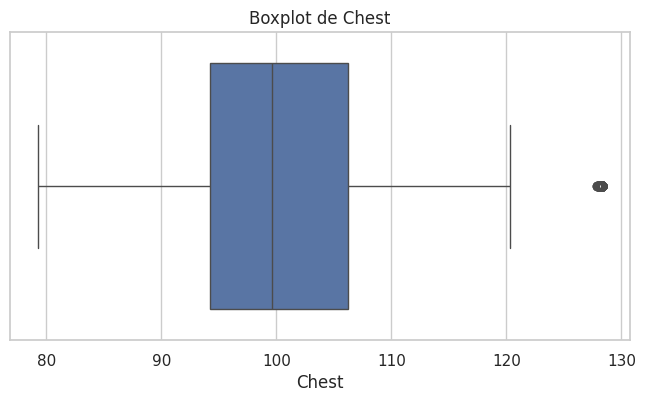

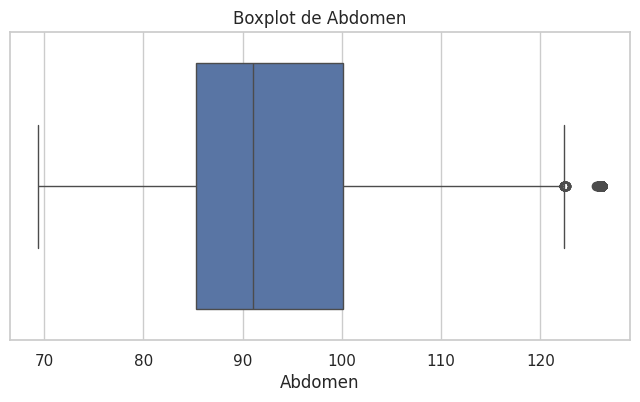

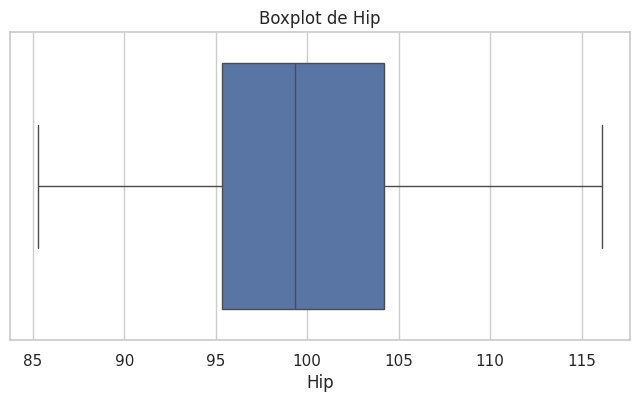

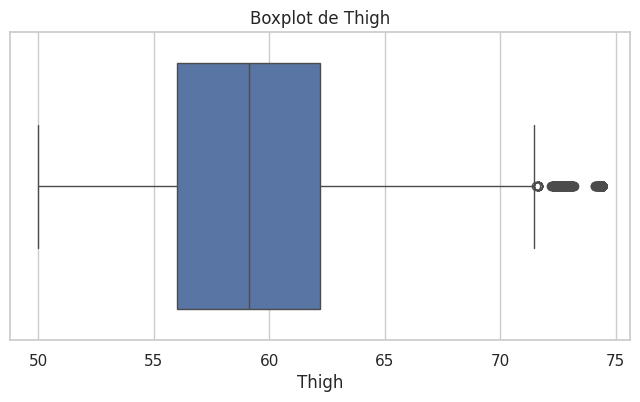

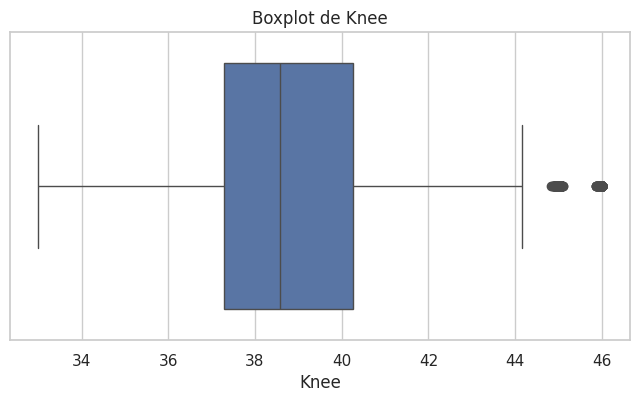

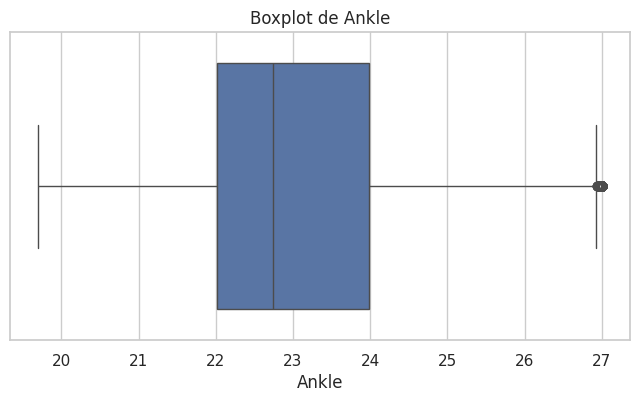

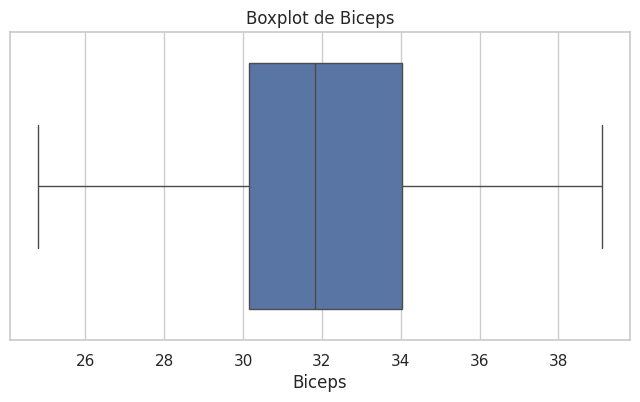

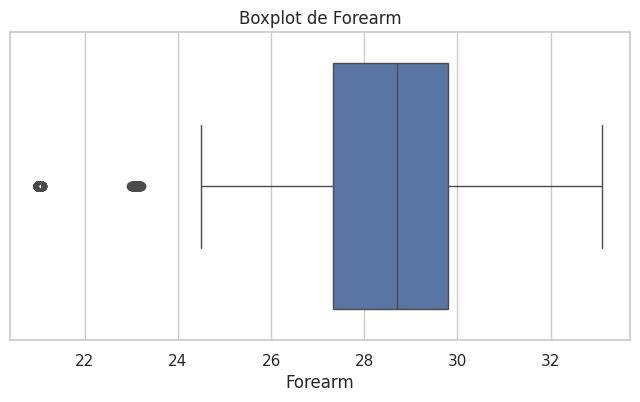

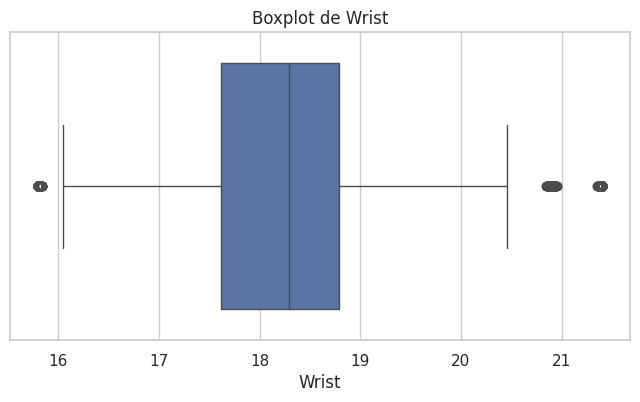

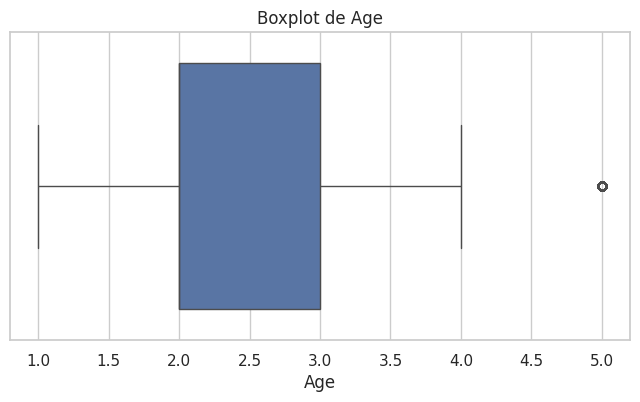

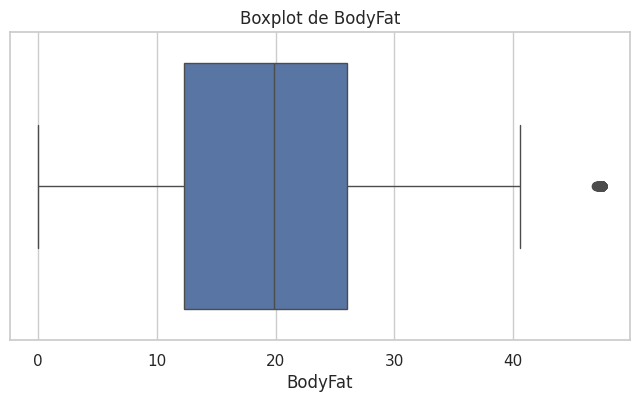

In [79]:
# Verificar outliers nas variáveis numéricas usando boxplots

numeric_cols = df_analise.select_dtypes(include=[np.number]).columns.tolist()
for col in numeric_cols:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=df_analise[col])
    plt.title(f'Boxplot de {col}')
    plt.show()

#### Tratamento de outliers encontrados em height e forearms

Tratamento de outliers concluído para as colunas: Height e Forearm.


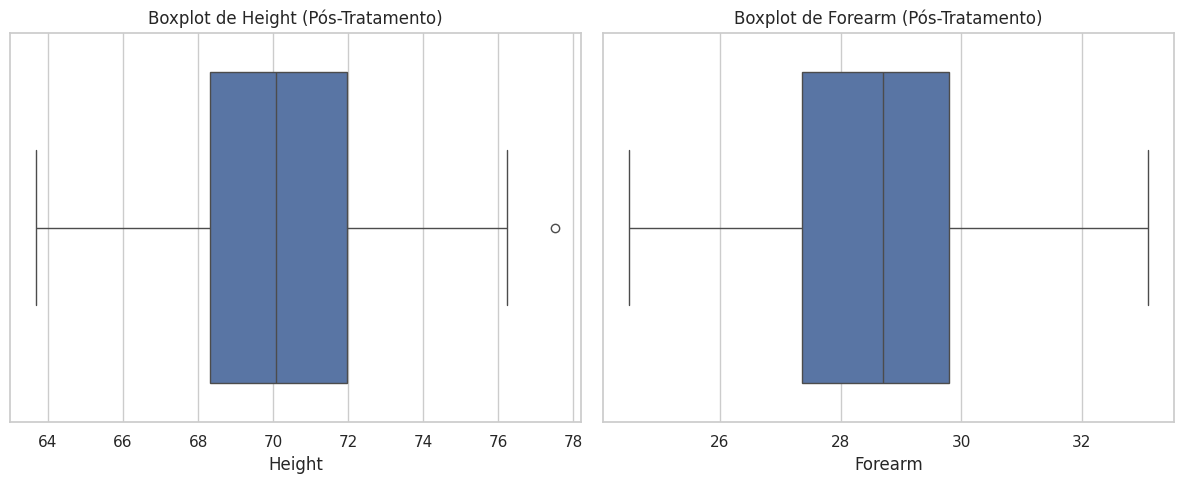

In [80]:
# substituição de outliers pela mediana

# 1. Lista das colunas que você deseja tratar
colunas_alvo = ['Height', 'Forearm']

for col in colunas_alvo:
    # 2. Calcular o 1º e 3º quartil
    Q1 = df_analise[col].quantile(0.25)
    Q3 = df_analise[col].quantile(0.75)
    IQR = Q3 - Q1
    
    # 3. Definir os limites aceitáveis
    limite_inferior = Q1 - 1.5 * IQR
    limite_superior = Q3 + 1.5 * IQR
    
    # 4. Calcular a mediana para a substituição
    mediana = df_analise[col].median()
    
    # 5. Substituir os valores fora dos limites pela mediana
    # O comando .mask substitui o valor onde a condição for VERDADEIRA
    df_analise[col] = df_analise[col].mask((df_analise[col] < limite_inferior) | (df_analise[col] > limite_superior), mediana)

print("Tratamento de outliers concluído para as colunas: Height e Forearm.")

# Visualização rápida para conferir o resultado

fig, axes = plt.subplots(1, 2, figsize=(12, 5))
for i, col in enumerate(colunas_alvo):
    sns.boxplot(x=df_analise[col], ax=axes[i])
    axes[i].set_title(f'Boxplot de {col} (Pós-Tratamento)')

plt.tight_layout()
plt.show()

In [81]:
# VIF para analisar multicolinearidade entre variáveis 

X_vif = df_analise.copy()
X_vif.drop(columns=['BodyFat'], inplace=True)
X_vif['intercept'] = 1

vif_data = pd.DataFrame()
vif_data["Variável"] = X_vif.columns
vif_data["VIF"] = [variance_inflation_factor(X_vif.values, i) for i in range(X_vif.shape[1])]

vif_result = vif_data[vif_data["Variável"] != 'intercept'].sort_values(by="VIF", ascending=False)

print("--- Fator de Inflação da Variância (VIF) ---")
print(vif_result)

--- Fator de Inflação da Variância (VIF) ---
         Variável        VIF
2          Weight  28.561811
6         Abdomen  15.626124
0   AdiposeTissue  12.607354
1         Density  10.898344
5           Chest   9.618386
7             Hip   8.360780
9            Knee   5.352163
8           Thigh   4.967780
12        Forearm   3.663792
4            Neck   3.493478
13          Wrist   3.349578
11         Biceps   3.346876
10          Ankle   3.255748
3          Height   1.977397
14            Age   1.941671


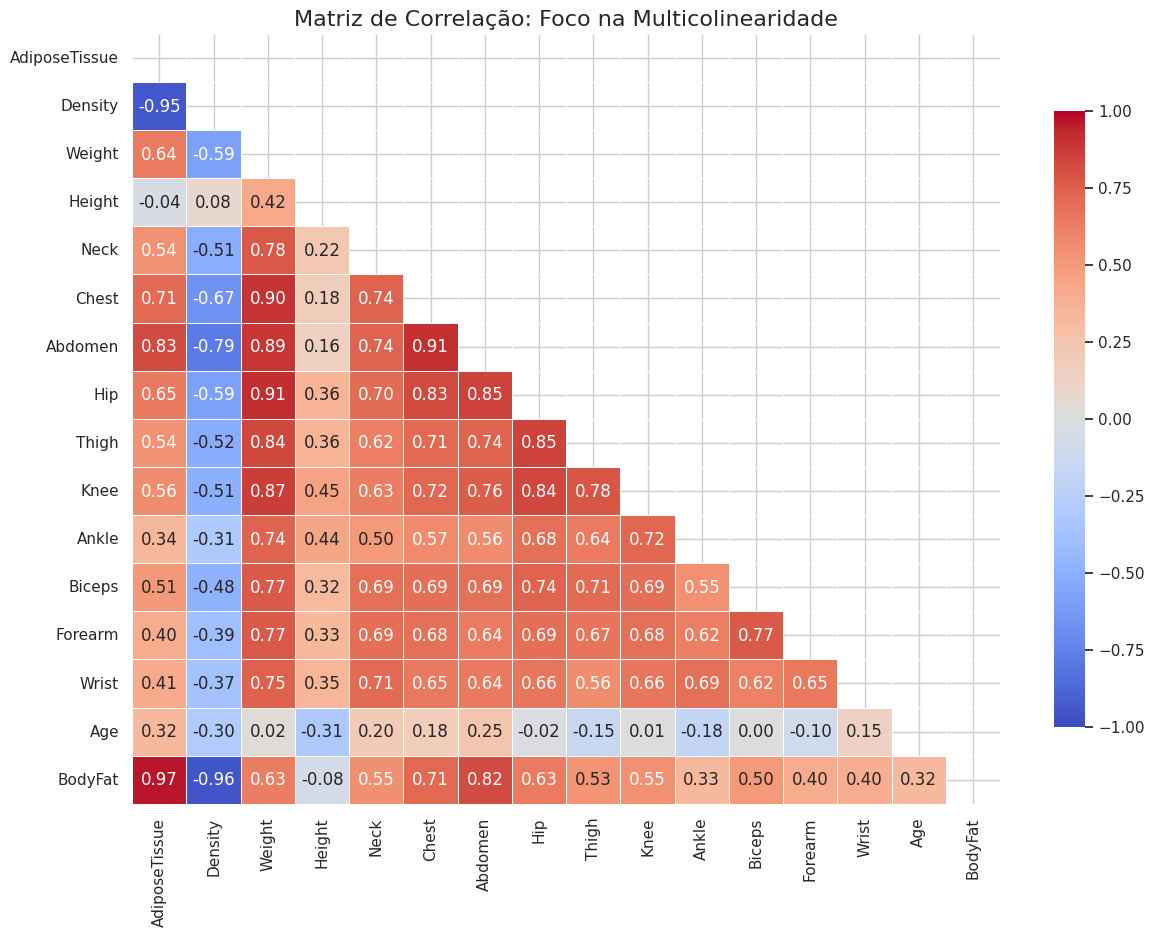

In [82]:
# Heatmap para analisar correlação entre variáveis

corr = df_analise.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
plt.figure(figsize=(14, 10))

sns.heatmap(
    corr, 
    mask=mask,               
    annot=True,              
    fmt=".2f",            
    cmap='coolwarm',         
    vmin=-1, vmax=1,         
    center=0,                
    linewidths=.5,           
    cbar_kws={"shrink": .8}
)

plt.title("Matriz de Correlação: Foco na Multicolinearidade", fontsize=16)
plt.show()


In [83]:
correlacao_alvo = df_analise.corr()['BodyFat'].sort_values(ascending=False)
print(correlacao_alvo)

BodyFat          1.000000
AdiposeTissue    0.968747
Abdomen          0.821625
Chest            0.712709
Hip              0.634476
Weight           0.630466
Neck             0.550285
Knee             0.545433
Thigh            0.526361
Biceps           0.499776
Forearm          0.402395
Wrist            0.395656
Ankle            0.325603
Age              0.324148
Height          -0.076099
Density         -0.955406
Name: BodyFat, dtype: float64


#### Conclusão: 
##### Após a análise da Matriz de Correlação e do VIF, optou-se pela exclusão da variável Density pelos seguintes motivos: 1. Target Leakage: Esta variável apresenta uma correlação quase perfeita com o alvo (BodyFat) o que poderia impedir o modelo de aprender as relações antropométricas reais. 2. Multicolinearidade Extrema: Conforme orientado no desafio , variáveis derivadas de fórmulas físicas de densidade inflam a variância do modelo, tornando os coeficientes e p-values instáveis.

In [84]:
# dropar a coluna Density

df_analise = df_analise.drop(columns=['Density'])

In [85]:
# recalcular o VIF sem a coluna Density

X_vif = df_analise.copy()
X_vif.drop(columns=['BodyFat'], inplace=True)
X_vif['intercept'] = 1

vif_data = pd.DataFrame()
vif_data["Variável"] = X_vif.columns
vif_data["VIF"] = [variance_inflation_factor(X_vif.values, i) for i in range(X_vif.shape[1])]

vif_result = vif_data[vif_data["Variável"] != 'intercept'].sort_values(by="VIF", ascending=False)

print("--- Fator de Inflação da Variância (VIF) ---")
print(vif_result)

--- Fator de Inflação da Variância (VIF) ---
         Variável        VIF
1          Weight  27.647933
5         Abdomen  15.023722
4           Chest   9.605634
6             Hip   8.243909
8            Knee   5.348130
7           Thigh   4.850484
0   AdiposeTissue   3.896746
11        Forearm   3.633504
3            Neck   3.484951
12          Wrist   3.349399
10         Biceps   3.345414
9           Ankle   3.243900
2          Height   1.976579
13            Age   1.930740


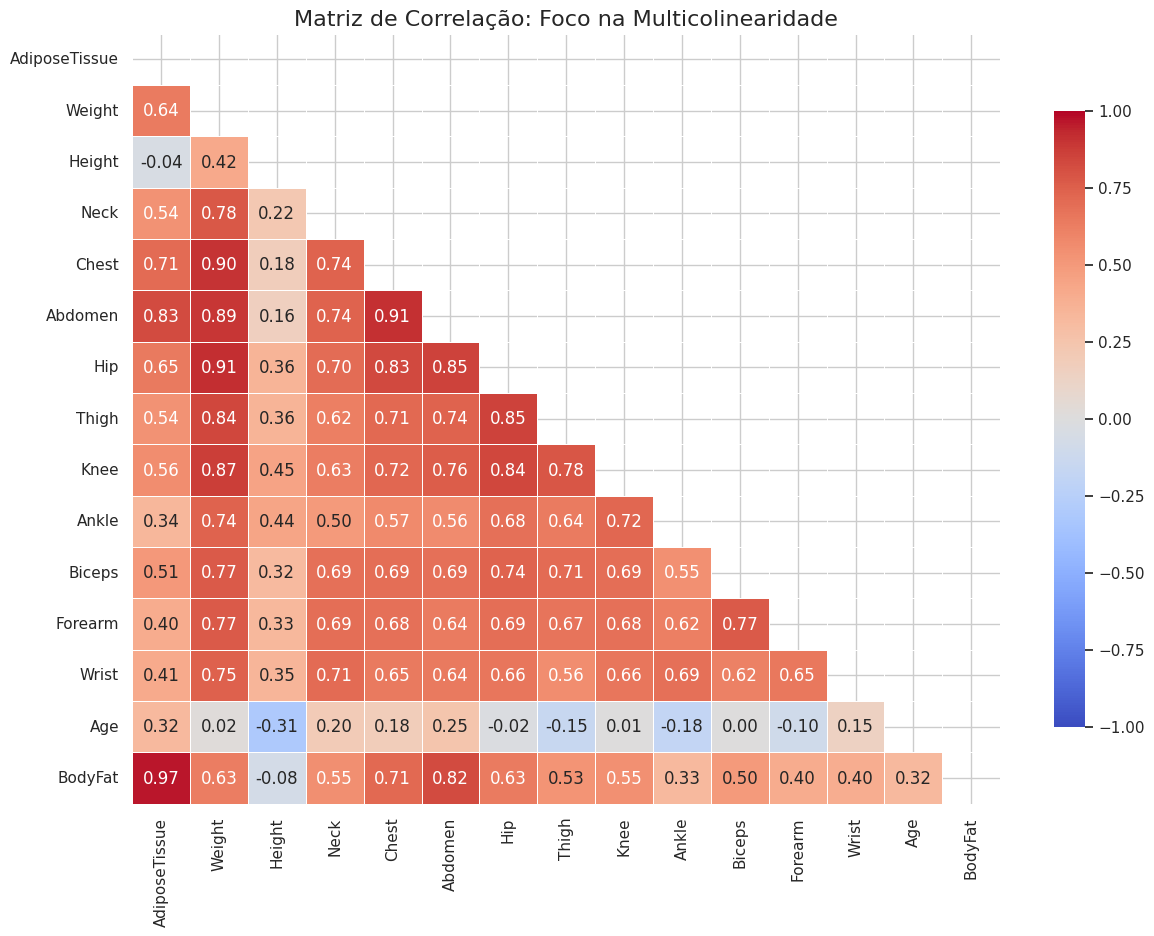

In [86]:
# Heatmap para analisar correlação entre variáveis

corr = df_analise.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
plt.figure(figsize=(14, 10))

sns.heatmap(
    corr, 
    mask=mask,               
    annot=True,              
    fmt=".2f",            
    cmap='coolwarm',         
    vmin=-1, vmax=1,         
    center=0,                
    linewidths=.5,           
    cbar_kws={"shrink": .8}
)

plt.title("Matriz de Correlação: Foco na Multicolinearidade", fontsize=16)
plt.show()

In [87]:
correlacao_alvo = df_analise.corr()['BodyFat'].sort_values(ascending=False)
print(correlacao_alvo)

BodyFat          1.000000
AdiposeTissue    0.968747
Abdomen          0.821625
Chest            0.712709
Hip              0.634476
Weight           0.630466
Neck             0.550285
Knee             0.545433
Thigh            0.526361
Biceps           0.499776
Forearm          0.402395
Wrist            0.395656
Ankle            0.325603
Age              0.324148
Height          -0.076099
Name: BodyFat, dtype: float64


In [88]:
# dropar a coluna AdiposeTissue

df_analise = df_analise.drop(columns=['AdiposeTissue'])

In [89]:
# recalcular o VIF sem a coluna AdiposeTissue

X_vif = df_analise.copy()
X_vif.drop(columns=['BodyFat'], inplace=True)
X_vif['intercept'] = 1

vif_data = pd.DataFrame()
vif_data["Variável"] = X_vif.columns
vif_data["VIF"] = [variance_inflation_factor(X_vif.values, i) for i in range(X_vif.shape[1])]

vif_result = vif_data[vif_data["Variável"] != 'intercept'].sort_values(by="VIF", ascending=False)

print("--- Fator de Inflação da Variância (VIF) ---")
print(vif_result)

--- Fator de Inflação da Variância (VIF) ---
   Variável        VIF
0    Weight  27.384088
4   Abdomen  10.210866
3     Chest   9.580588
5       Hip   8.231713
7      Knee   5.329213
6     Thigh   4.850245
10  Forearm   3.605033
2      Neck   3.484531
9    Biceps   3.324238
11    Wrist   3.309813
8     Ankle   3.243641
1    Height   1.943113
12      Age   1.922472


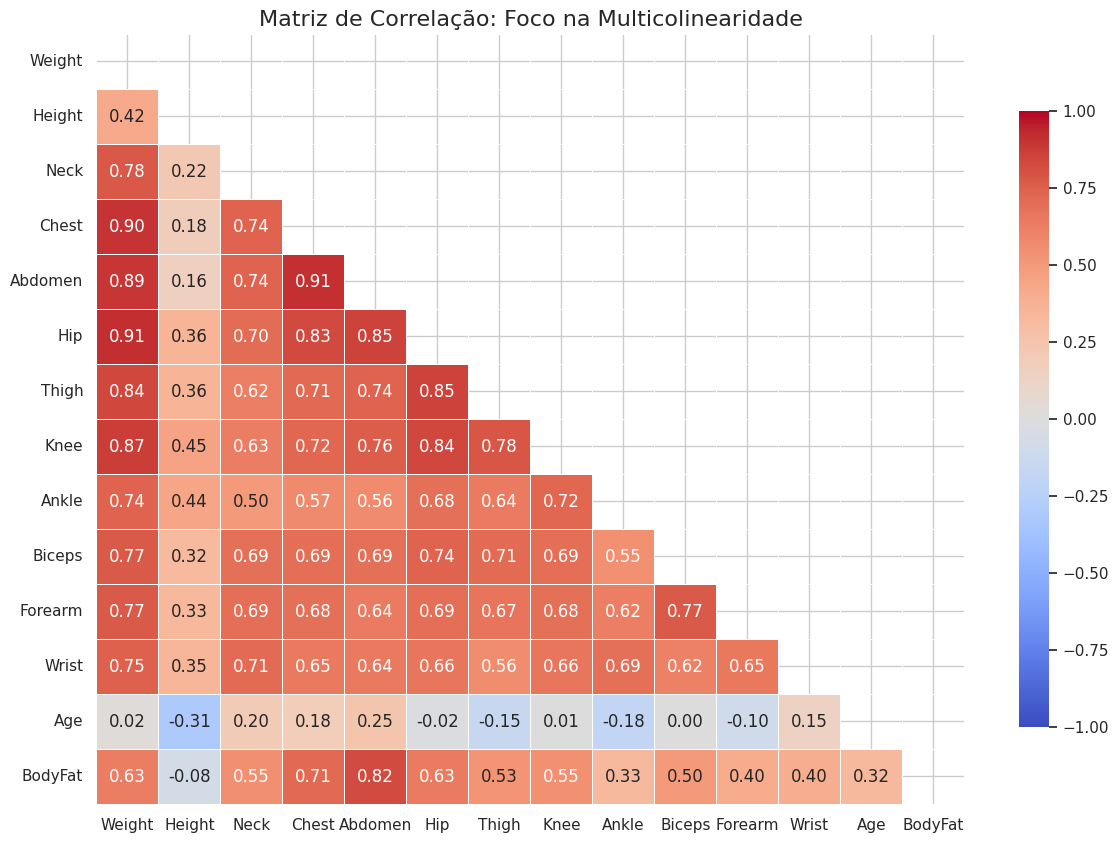

In [90]:
# Heatmap para analisar correlação entre variáveis

corr = df_analise.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
plt.figure(figsize=(14, 10))

sns.heatmap(
    corr, 
    mask=mask,               
    annot=True,              
    fmt=".2f",            
    cmap='coolwarm',         
    vmin=-1, vmax=1,         
    center=0,                
    linewidths=.5,           
    cbar_kws={"shrink": .8}
)

plt.title("Matriz de Correlação: Foco na Multicolinearidade", fontsize=16)
plt.show()

In [91]:
correlacao_alvo = df_analise.corr()['BodyFat'].sort_values(ascending=False)
print(correlacao_alvo)

BodyFat    1.000000
Abdomen    0.821625
Chest      0.712709
Hip        0.634476
Weight     0.630466
Neck       0.550285
Knee       0.545433
Thigh      0.526361
Biceps     0.499776
Forearm    0.402395
Wrist      0.395656
Ankle      0.325603
Age        0.324148
Height    -0.076099
Name: BodyFat, dtype: float64


In [92]:
display(df_analise)

,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist,Age,BodyFat
24524,178.320,70.270,37.680,99.618,90.716,99.030,60.23,39.180,23.198,31.700,28.42,18.600,1,12.45
9043,218.970,74.160,39.950,108.700,104.950,107.648,67.95,42.800,24.090,35.510,29.04,19.050,2,26.94
104835,184.096,73.950,38.080,100.720,82.350,99.690,62.79,38.320,23.820,35.830,31.15,18.210,2,3.93
162234,173.520,71.546,37.680,98.254,90.780,99.872,60.09,39.170,23.380,32.500,29.87,17.410,2,16.34
55091,228.650,71.464,40.350,114.850,116.210,111.830,74.35,42.580,23.960,36.100,31.76,18.810,2,34.20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71251,210.920,71.880,38.460,107.530,94.392,104.120,63.43,41.982,25.610,35.300,30.45,18.860,1,20.32
64774,209.950,71.966,38.970,107.412,94.350,107.750,65.92,42.000,25.610,33.710,30.63,19.406,1,20.80
76351,201.060,69.450,40.550,111.750,103.690,105.690,61.84,39.740,22.720,37.630,30.80,19.170,4,27.66
95148,126.910,66.766,33.960,90.480,75.150,89.170,50.02,34.790,21.970,24.940,25.90,16.958,2,0.55


In [93]:
# remocao de Weight por indicio de multicolinearidade

df_analise.drop(columns=['Weight'], inplace=True)

In [94]:
# Apenas removemos o alvo (BodyFat), mantendo a coluna Age como numérica
X_model = df_analise.drop(columns=['BodyFat'])

# 2. Adicionar a constante para o modelo OLS
X_model = sm.add_constant(X_model)

# 3. Definir a variável alvo
y = df_analise['BodyFat']

# 4. Treinar o modelo OLS
# Agora a coluna 'Age' será tratada como um único coeficiente no cálculo
modelo_v1 = sm.OLS(y, X_model).fit()


print(modelo_v1.summary())

                            OLS Regression Results                            
Dep. Variable:                BodyFat   R-squared:                       0.743
Model:                            OLS   Adj. R-squared:                  0.742
Method:                 Least Squares   F-statistic:                     8503.
Date:                Fri, 09 Jan 2026   Prob (F-statistic):               0.00
Time:                        06:58:39   Log-Likelihood:            -1.0303e+05
No. Observations:               35400   AIC:                         2.061e+05
Df Residuals:                   35387   BIC:                         2.062e+05
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.5105      0.820     22.576      0.0

In [95]:
df_analise.columns.unique()

Index(['Height', 'Neck', 'Chest', 'Abdomen', 'Hip', 'Thigh', 'Knee', 'Ankle',
       'Biceps', 'Forearm', 'Wrist', 'Age', 'BodyFat'],
      dtype='object')

In [96]:
X_model = sm.add_constant(X_model.drop(columns=['Hip']))
y = df_analise['BodyFat']

# # 3. Treinar o modelo OLS (Ordinary Least Squares)
modelo_v2 = sm.OLS(y, X_model.astype(float)).fit()

# # 4. Exibir o Relatório
print(modelo_v2.summary())

                            OLS Regression Results                            
Dep. Variable:                BodyFat   R-squared:                       0.742
Model:                            OLS   Adj. R-squared:                  0.742
Method:                 Least Squares   F-statistic:                     9276.
Date:                Fri, 09 Jan 2026   Prob (F-statistic):               0.00
Time:                        06:59:22   Log-Likelihood:            -1.0303e+05
No. Observations:               35400   AIC:                         2.061e+05
Df Residuals:                   35388   BIC:                         2.062e+05
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.7237      0.812     23.055      0.0

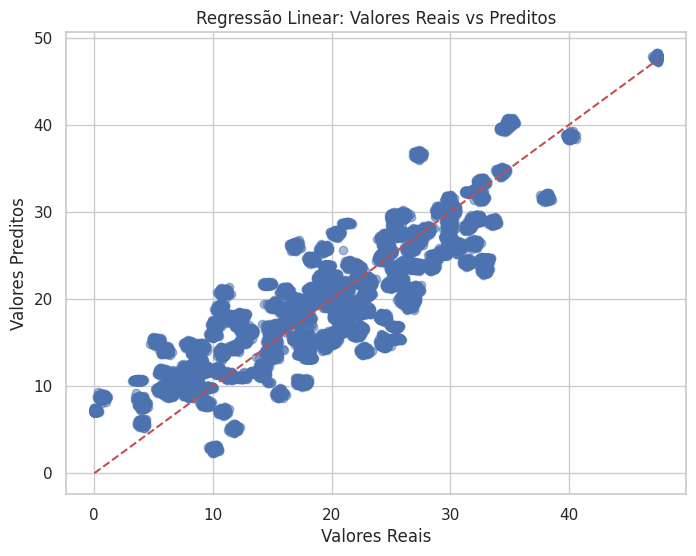

In [97]:
y_pred = modelo_v2.predict(X_model)
plt.figure(figsize=(8,6))
plt.scatter(y, y_pred, alpha=0.5)
plt.xlabel("Valores Reais")
plt.ylabel("Valores Preditos")
plt.title("Regressão Linear: Valores Reais vs Preditos")
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
plt.show()

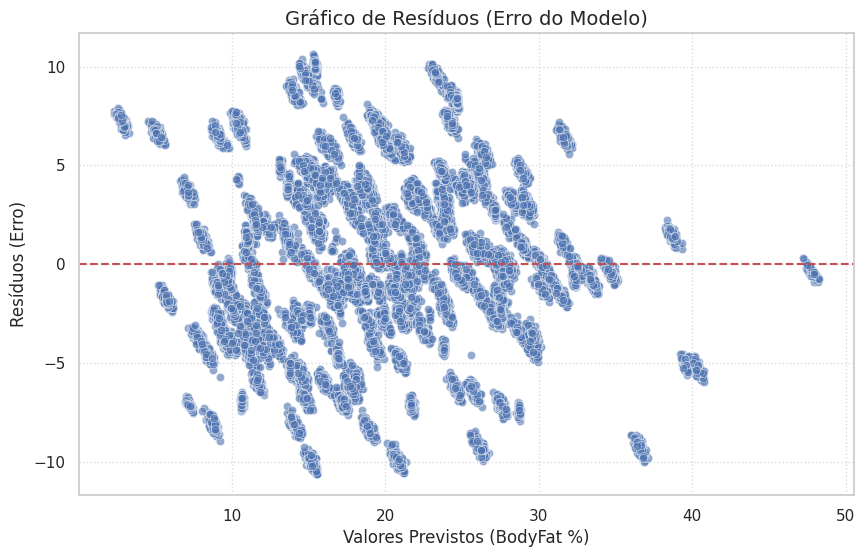

In [ ]:
# Calcular os resíduos (o erro: Real - Previsto)
residuos = y - y_pred

# Criar o gráfico de dispersão
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_pred, y=residuos, alpha=0.6)

# Adicionar uma linha horizontal no zero
plt.axhline(y=0, color='r', linestyle='--')

# Configurações de títulos e eixos
plt.title('Gráfico de Resíduos (Erro do Modelo)', fontsize=14)
plt.xlabel('Valores Previstos (BodyFat %)', fontsize=12)
plt.ylabel('Resíduos (Erro)', fontsize=12)
plt.grid(True, linestyle=':', alpha=0.7)

plt.show()